<a href="https://colab.research.google.com/github/s-kamireddy/HW-2-Heart-Attack-Decision-Tree-Classifier/blob/main/ProjectsHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Decision Tree Classifiers to predict heart attack risk

In [1]:
# import required libraries from titanic example
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree

import torch
import warnings
warnings.filterwarnings("ignore")

Exploratory Data Analysis

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(path +'/heart_attack_prediction_dataset.csv')

Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2


In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.shape
df.isna().sum()

,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
df.describe(include=['O'])

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2
top,BMW7812,Male,146/94,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,8,2960,477,2543,5660


In [7]:
df["Heart Attack Risk"].value_counts(normalize=True)

,proportion
Heart Attack Risk,
0,0.641789
1,0.358211


In [8]:
# Convert categorical data to numerical data using cat.codes
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].astype('category')
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].cat.codes
df['Diet'] = df['Diet'].astype('category')
df['Diet'] = df['Diet'].cat.codes
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes
df['Continent'] = df['Continent'].astype('category')
df['Continent'] = df['Continent'].cat.codes
df['Hemisphere'] = df['Hemisphere'].astype('category')
df['Hemisphere'] = df['Hemisphere'].cat.codes

#convert blood pressure to a simple numeric value using Mean Arterial Blood pressure formula
def bp_value(str):
  str = str.split('/')
  return (float(str[0])+ (2*float(str[1])))/3

df['Blood Pressure'] = df['Blood Pressure'].map(bp_value)

#remove patient ID
df.drop('Patient ID', axis=1, inplace=True)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int8   
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   float64
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   int16  
 11  Diet                             8763 non-null   int8   
 12  Previous Heart Probl

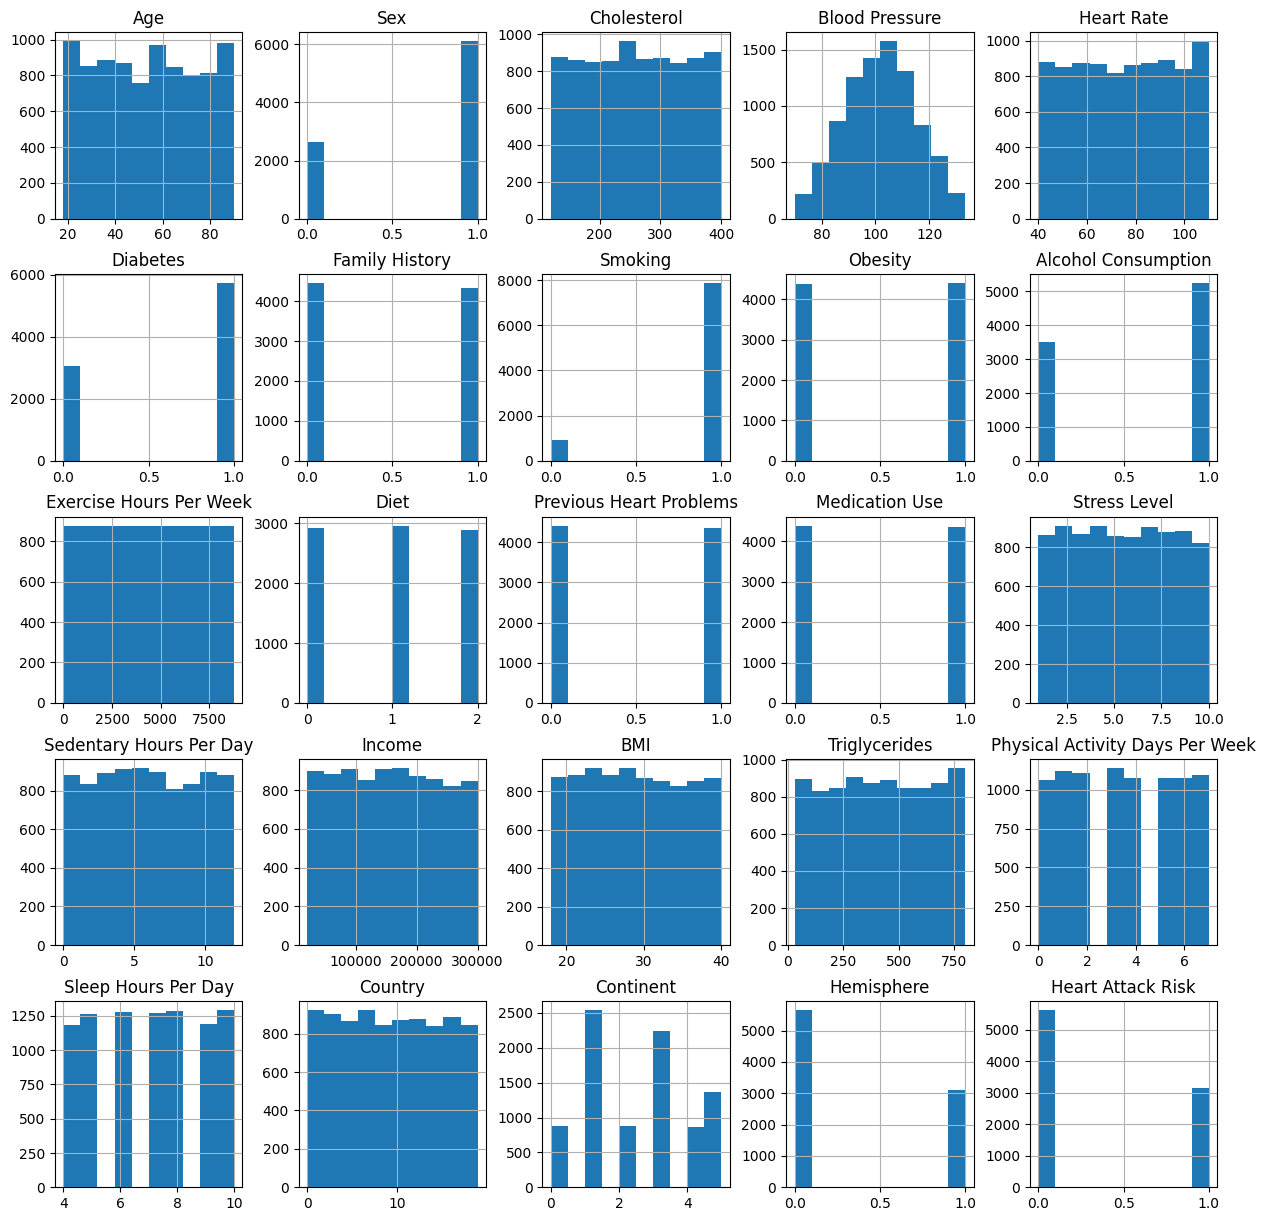

In [10]:
#show distributions
df.hist(figsize=(15,15))
plt.show()

We see high rates of correlation between country, hemisphere, and continent (as expected) but also between age, sex, and smoking (presumably because older people and males are more likley to smoke). Therefore we will remove the hemisphere, continent, and smoking features in this dataset.

In [11]:
df.drop(['Continent', 'Hemisphere', 'Smoking'], axis=1, inplace=True)

In [12]:
Y = df['Heart Attack Risk'].values
Y = (Y > 0.5).astype(int)
X = df.drop('Heart Attack Risk', axis=1).values
x_names = df.columns.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Task 1
-----
Implement a decision tree classifier for teh classification problem. You may use a built-in package to implement your classifier. Additionally


*   Visualize the decision tree structure for at least 3 different parameter settings. Comment on how teh complexity and depth change the tree
*   Do some research on sensitivity analysis and how it is performed (w/ citations). Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary



In [13]:
Y_train = (Y_train > 0.5).astype(int)
Y_test = (Y_test > 0.5).astype(int)


In [14]:
def print_tree(cart, feature_names, value_names):
   plt.figure(figsize=(20,20))
   tree.plot_tree(cart, filled = True, rounded = True,feature_names = feature_names, class_names = value_names)
   plt.show()

Default setting with no pruning

In [15]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

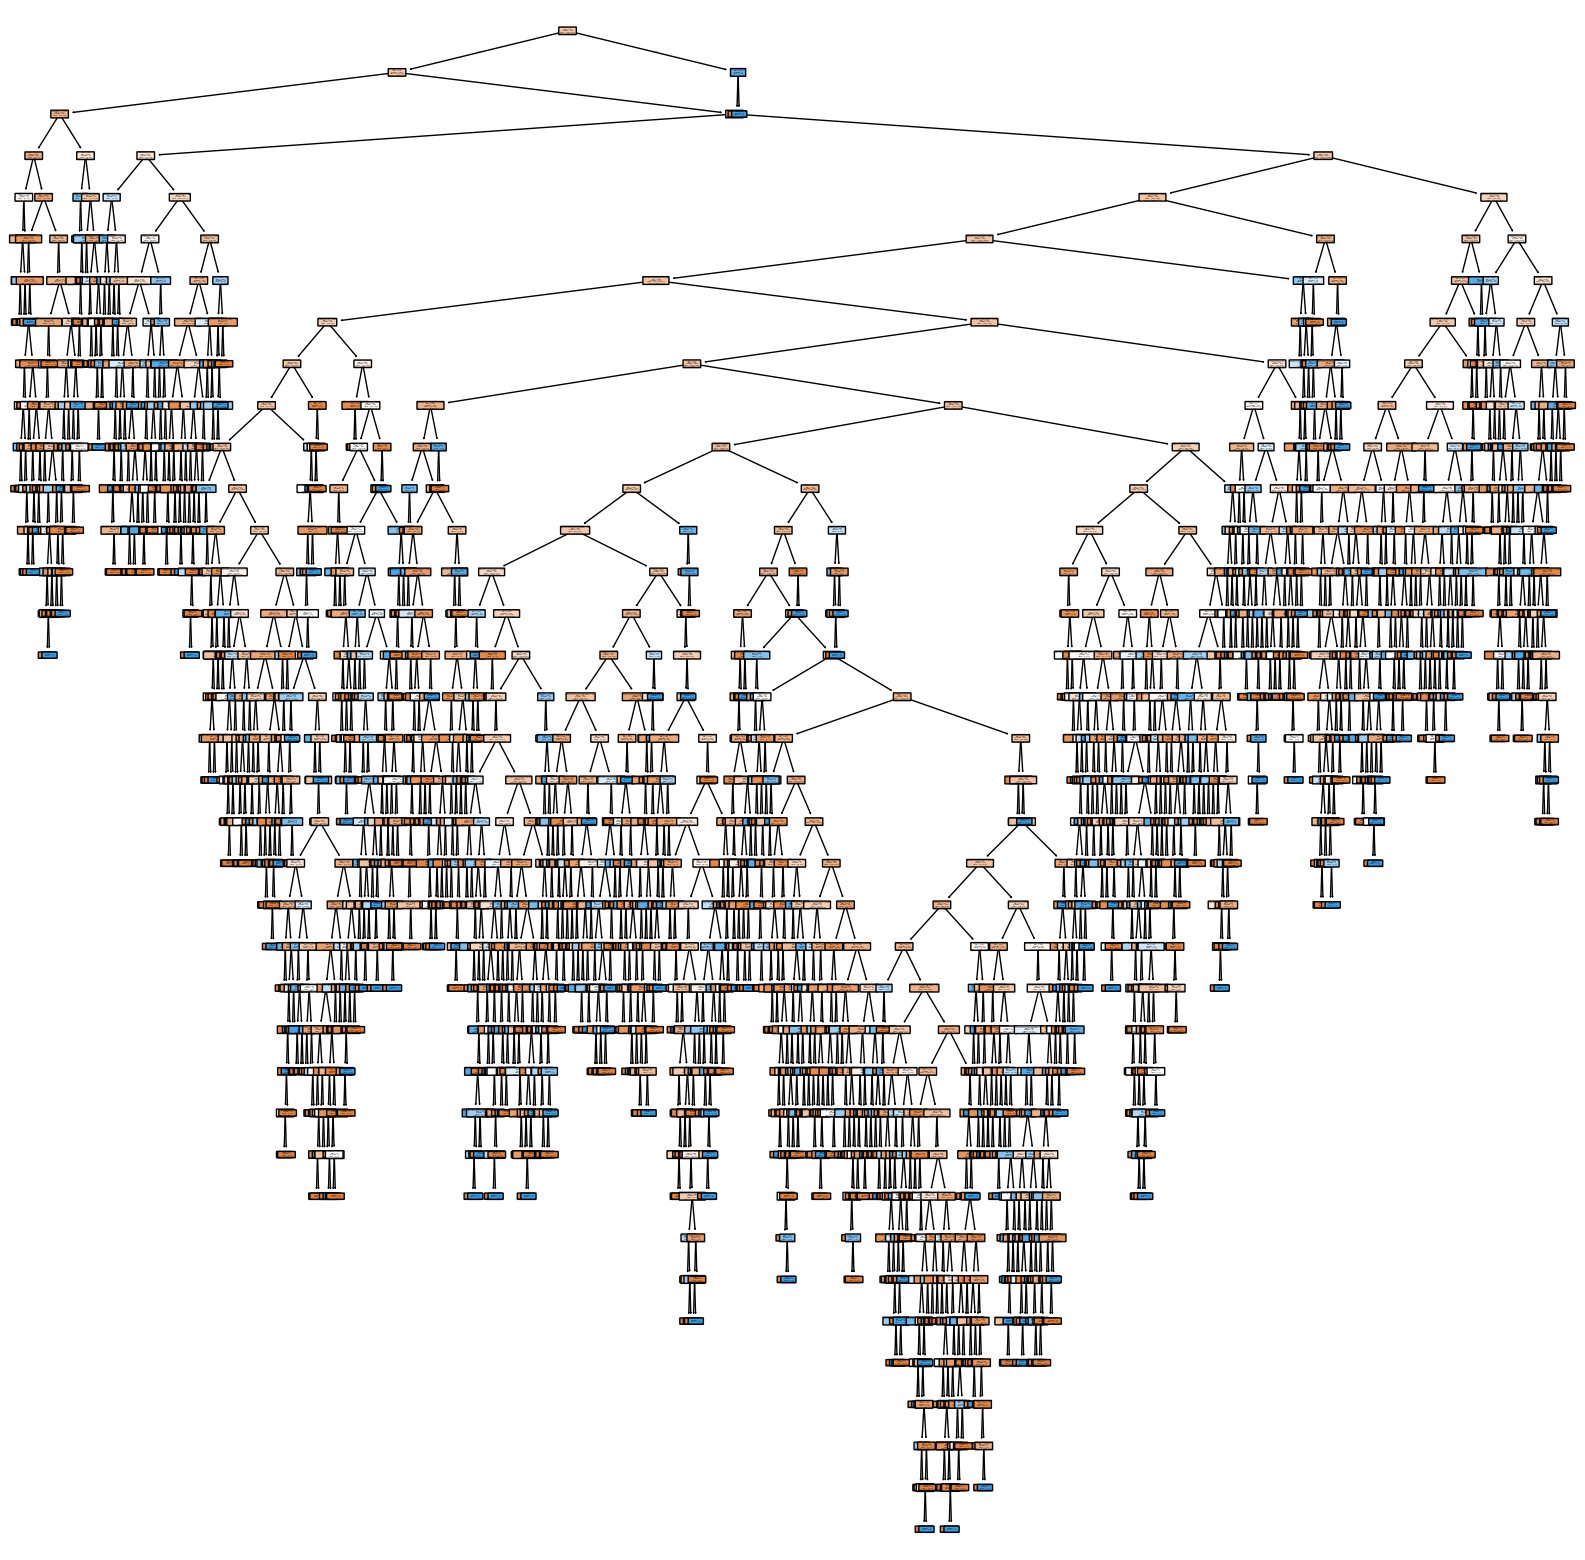

In [16]:
print_tree(decision_tree, x_names, ['No Heart Attack', 'Heart Attack'])

Limiting the number of layers to 4

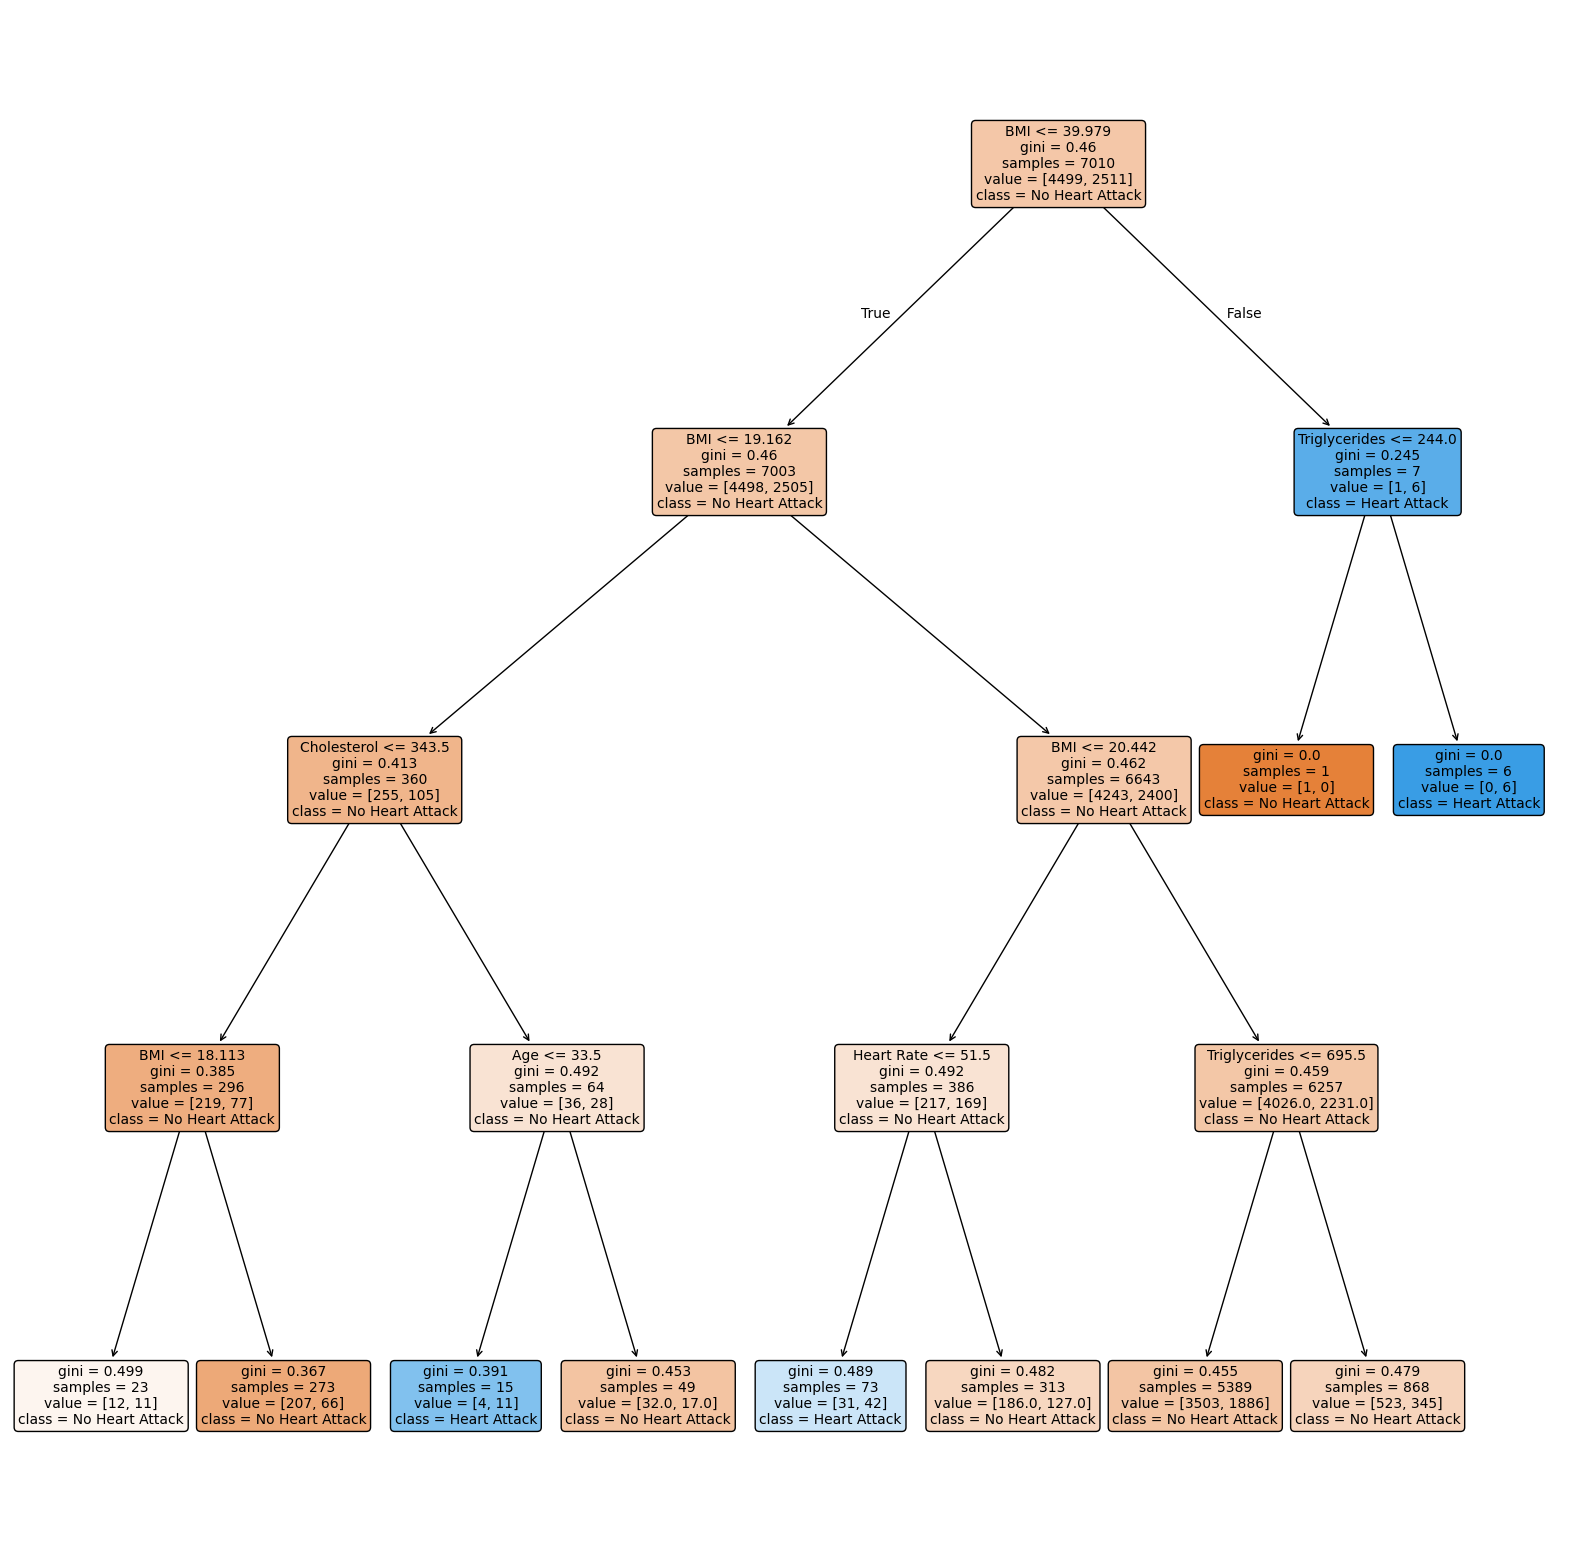

In [17]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train, Y_train)
X_train.shape
print_tree(decision_tree, x_names, ['No Heart Attack', 'Heart Attack'])

In [18]:
print(X_train.shape)

(7010, 21)


Limiting the number of leaves, depth, and minimpurity split

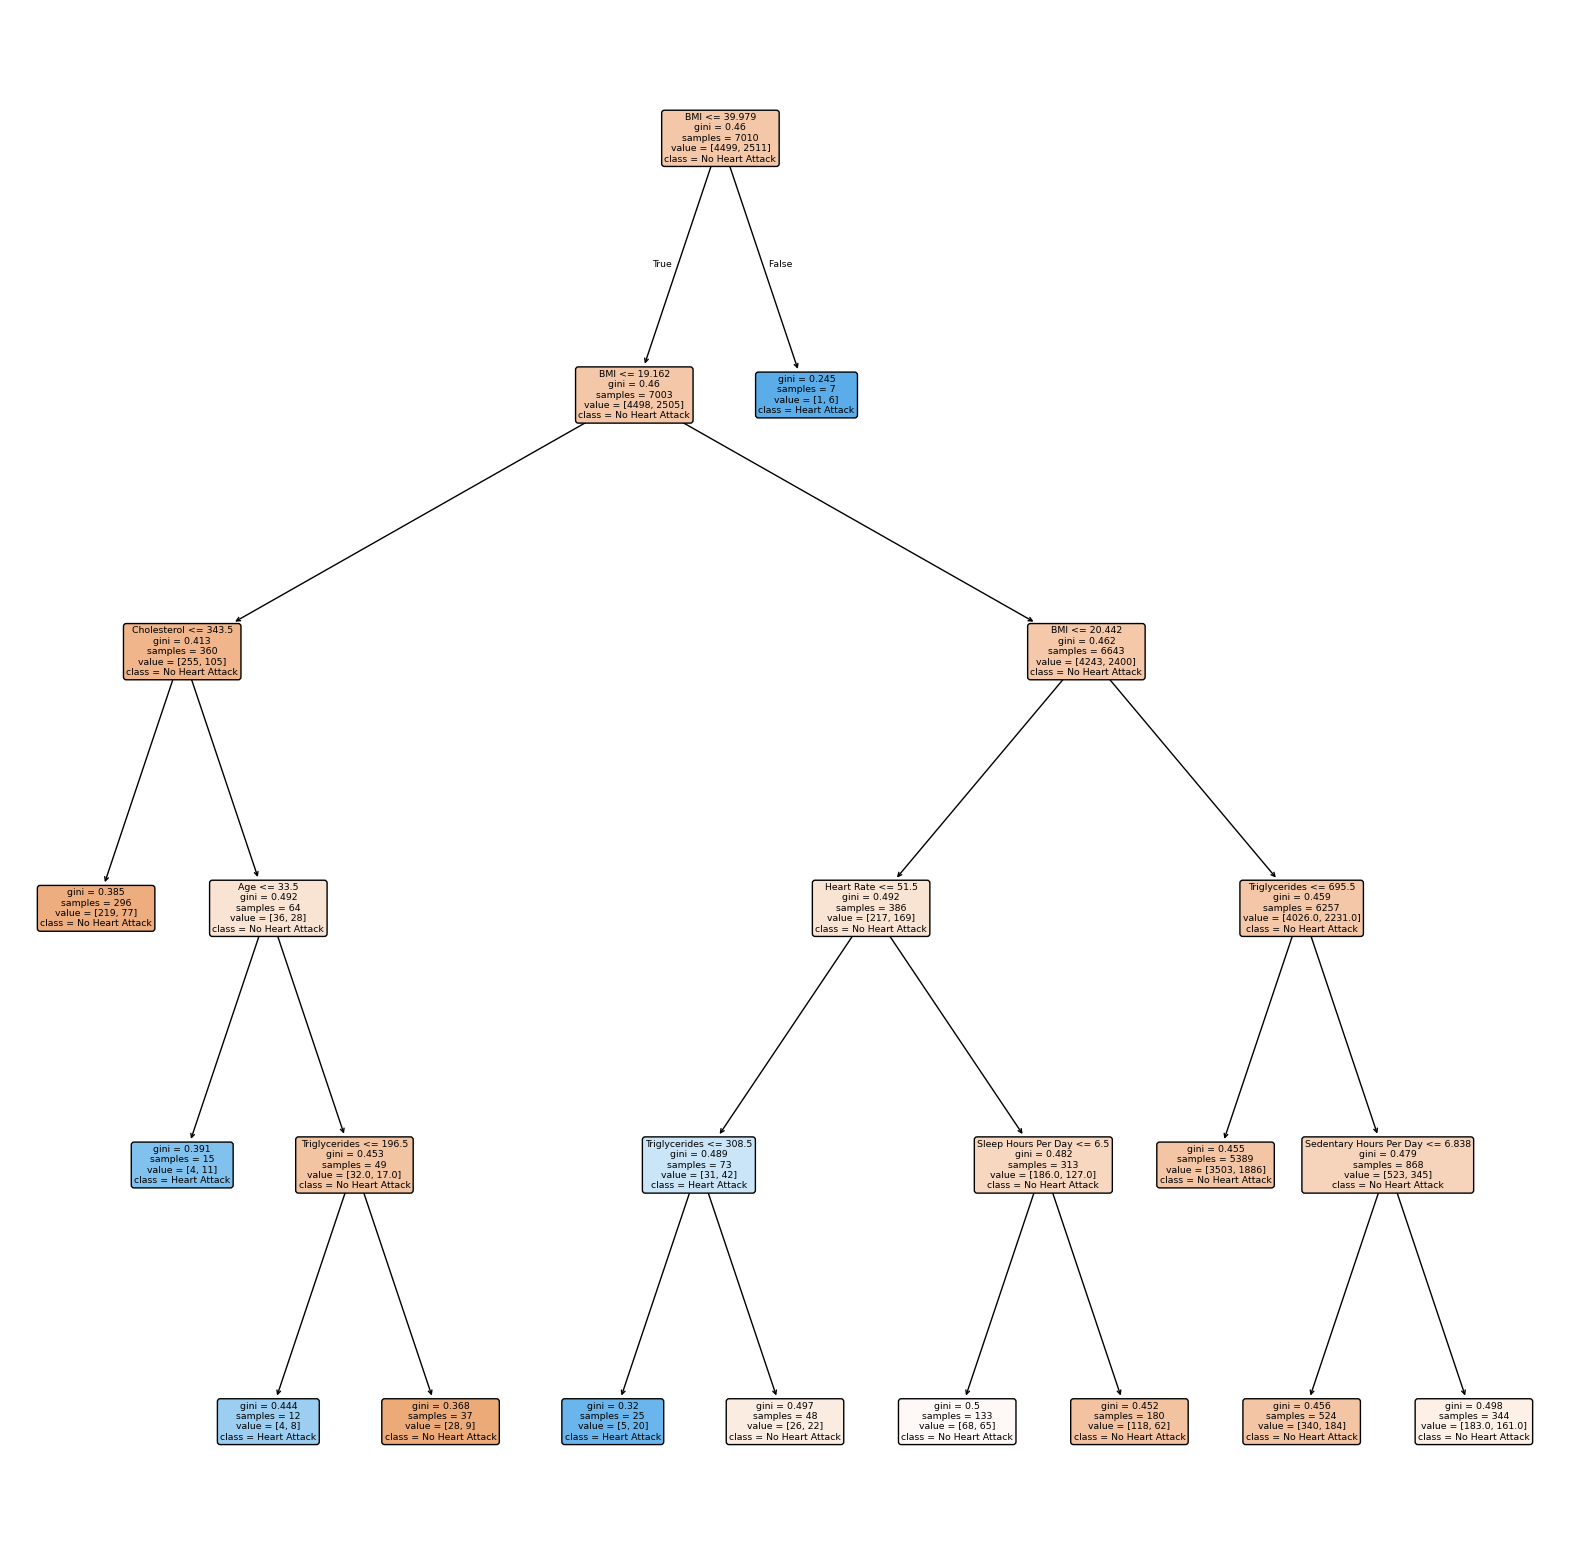

In [19]:
decision_tree = tree.DecisionTreeClassifier( max_depth = 5,min_impurity_decrease = 0.0004)
decision_tree.fit(X_train, Y_train)
print_tree(decision_tree, x_names, ['No Heart Attack', 'Heart Attack'])


Sensitivity Analysis
-----
Sensitivity Analysis test the effect of a variable by holding all others constant and varying that variable to measure its effects.

Source: https://nickderobertis.github.io/sensitivity/auto_examples/sensitivity_analysis.html#how-to-do-sensitivity-analysis-in-python


In [20]:
def sensitivity_analysis(tree,feature_names):
  for i in range(len(feature_names[:-1])):
    print(f'Feature: {feature_names[i]} Importance: {tree.feature_importances_[i]}')




In [21]:
#generate data for sensitivity test
sensitivity_dict = {
    "Age": np.linspace(df["Age"].min(), df["Age"].max(), 100),
    "Sex": np.linspace(df["Sex"].min(), df["Sex"].max(), 100),
    "Cholesterol": np.linspace(df["Cholesterol"].min(), df["Cholesterol"].max(), 100),
    "Blood Pressure": np.linspace(df["Blood Pressure"].min(), df["Blood Pressure"].max(), 100),
    "Heart Rate": np.linspace(df["Heart Rate"].min(), df["Heart Rate"].max(), 100),
    "Diabetes": np.linspace(df["Diabetes"].min(), df["Diabetes"].max(), 100),
    "Family History": np.linspace(df["Family History"].min(), df["Family History"].max(), 100),
    "Obesity": np.linspace(df["Obesity"].min(), df["Obesity"].max(), 100),
    "Alcohol Consumption": np.linspace(df["Alcohol Consumption"].min(), df["Alcohol Consumption"].max(), 100),
    "Exercise Hours Per Week": np.linspace(df["Exercise Hours Per Week"].min(), df["Exercise Hours Per Week"].max(), 100),
    "Diet": np.linspace(df["Diet"].min(), df["Diet"].max(), 100),
    "Previous Heart Problems": np.linspace(df["Previous Heart Problems"].min(), df["Previous Heart Problems"].max(), 100),
    "Medication Use": np.linspace(df["Medication Use"].min(), df["Medication Use"].max(), 100),
    "Stress Level": np.linspace(df["Stress Level"].min(), df["Stress Level"].max(), 100),
    "Sedentary Hours Per Day": np.linspace(df["Sedentary Hours Per Day"].min(), df["Sedentary Hours Per Day"].max(), 100),
    "Income": np.linspace(df["Income"].min(), df["Income"].max(), 100),
    "BMI": np.linspace(df["BMI"].min(), df["BMI"].max(), 100),
    "Triglycerides": np.linspace(df["Triglycerides"].min(), df["Triglycerides"].max(), 100),
    "Physical Activity Days Per Week": np.linspace(df["Physical Activity Days Per Week"].min(), df["Physical Activity Days Per Week"].max(), 100),
    "Sleep Hours Per Day": np.linspace(df["Sleep Hours Per Day"].min(), df["Sleep Hours Per Day"].max(), 100),
    "Country": np.linspace(df["Country"].min(), df["Country"].max(), 100),
}


In [22]:
sensitivity_analysis(decision_tree, x_names)

Feature: Age Importance: 0.08351177641202422
Feature: Sex Importance: 0.0
Feature: Cholesterol Importance: 0.08062741271516971
Feature: Blood Pressure Importance: 0.0
Feature: Heart Rate Importance: 0.08292152225028732
Feature: Diabetes Importance: 0.0
Feature: Family History Importance: 0.0
Feature: Obesity Importance: 0.0
Feature: Alcohol Consumption Importance: 0.0
Feature: Exercise Hours Per Week Importance: 0.0
Feature: Diet Importance: 0.0
Feature: Previous Heart Problems Importance: 0.0
Feature: Medication Use Importance: 0.0
Feature: Stress Level Importance: 0.0
Feature: Sedentary Hours Per Day Importance: 0.138170560531978
Feature: Income Importance: 0.0
Feature: BMI Importance: 0.28250441248494473
Feature: Triglycerides Importance: 0.2547191839506161
Feature: Physical Activity Days Per Week Importance: 0.0
Feature: Sleep Hours Per Day Importance: 0.07754513165497995
Feature: Country Importance: 0.0


In [23]:
X_sensitivity = np.array(list(sensitivity_dict.values())).T
Y_sensitivity = decision_tree.predict(X_sensitivity)


From both the sensitivities, and the tree, we can see the factors with the greatest impact are BMI, Age, Heart Rate, Cholestorol, and Triglyceride levels. Let us perform a more in depth analysis

In [24]:
df = pd.DataFrame(X_sensitivity, columns= x_names[:-1])
df["Heart Attack Risk"] = Y_sensitivity

df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,18.000000,0.000000,120.000000,70.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0
1,18.727273,0.010101,122.828283,70.639731,40.707071,0.010101,0.010101,0.010101,0.010101,88.505051,...,0.010101,1.090909,0.122456,22889.191919,18.224507,37.777778,0.070707,4.060606,0.191919,0
2,19.454545,0.020202,125.656566,71.279461,41.414141,0.020202,0.020202,0.020202,0.020202,177.010101,...,0.020202,1.181818,0.243648,25716.383838,18.446677,45.555556,0.141414,4.121212,0.383838,0
3,20.181818,0.030303,128.484848,71.919192,42.121212,0.030303,0.030303,0.030303,0.030303,265.515152,...,0.030303,1.272727,0.364840,28543.575758,18.668848,53.333333,0.212121,4.181818,0.575758,0
4,20.909091,0.040404,131.313131,72.558923,42.828283,0.040404,0.040404,0.040404,0.040404,354.020202,...,0.040404,1.363636,0.486033,31370.767677,18.891018,61.111111,0.282828,4.242424,0.767677,0


Taking a look at age and BMI

<Axes: xlabel='Age', ylabel='BMI'>

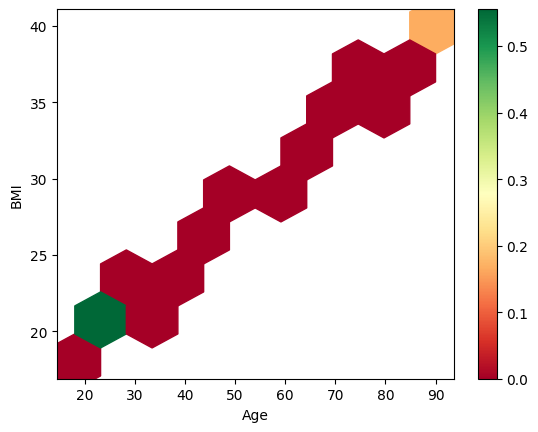

In [25]:
df.plot.hexbin(x='Age', y='BMI', C='Heart Attack Risk', gridsize=7, cmap='RdYlGn', sharex=False)

Taking a look at BMI and Cholesterol Level

<Axes: xlabel='BMI', ylabel='Cholesterol'>

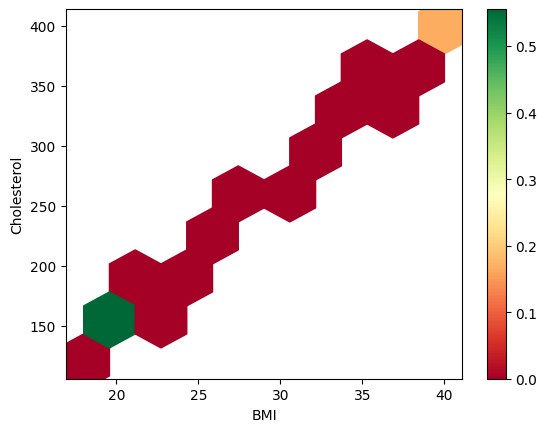

In [26]:
df.plot.hexbin(x='BMI', y='Cholesterol', C='Heart Attack Risk', gridsize=7, cmap='RdYlGn', sharex=False)

Looking at BMI and Heart Rate

<Axes: xlabel='BMI', ylabel='Heart Rate'>

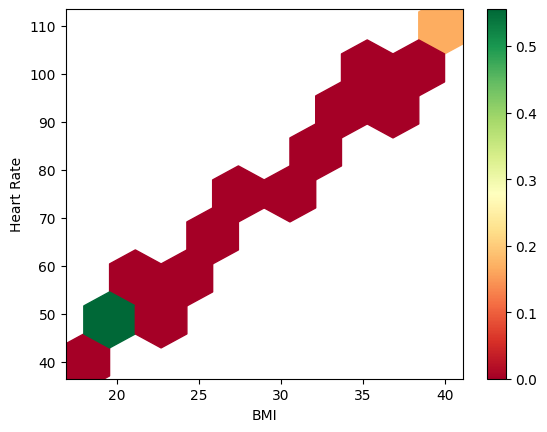

In [27]:
df.plot.hexbin(x='BMI', y='Heart Rate', C='Heart Attack Risk', gridsize=7, cmap='RdYlGn', sharex=False)

BMI and Triglycerides

<Axes: xlabel='BMI', ylabel='Triglycerides'>

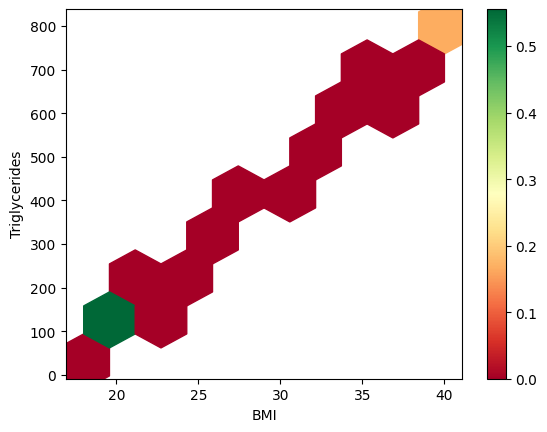

In [28]:
df.plot.hexbin(x='BMI', y='Triglycerides', C='Heart Attack Risk', gridsize=7, cmap='RdYlGn', sharex=False)

Age and Cholesterol

<Axes: xlabel='Age', ylabel='Cholesterol'>

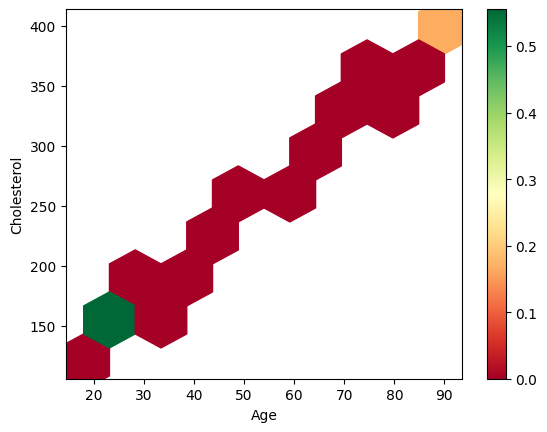

In [29]:
df.plot.hexbin(x='Age', y='Cholesterol', C='Heart Attack Risk', gridsize=7, cmap='RdYlGn', sharex=False)

Age and heart rate

<Axes: xlabel='Age', ylabel='Heart Rate'>

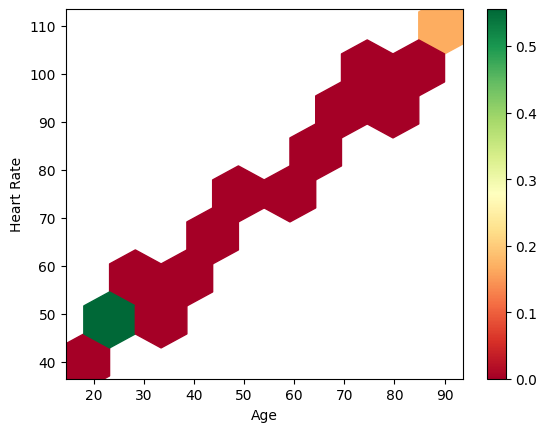

In [30]:
df.plot.hexbin(x='Age', y='Heart Rate', C='Heart Attack Risk', gridsize=7, cmap='RdYlGn', sharex=False)

From the analysis we can see that Age and BMI definitely have a large impact on heart attack risk

Task 2:
-----
 From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.


• Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).


• Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).


• Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?

Using the Bagged Decision Tree Method

In [31]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [32]:
model = BaggingClassifier(n_estimators=20, random_state=42)

# evaluate the model 5-fold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('5-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# evaluate the model 10-fold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('10-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# evaluate the model 15-fold
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('15-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on the whole dataset
model.fit(X_train, Y_train)

5-fold cross validation Accuracy: 0.609 (0.005)
10-fold cross validation Accuracy: 0.607 (0.011)
15-fold cross validation Accuracy: 0.610 (0.013)


BaggingClassifier(n_estimators=20, random_state=42)

Stacking: here we stack Logistic Regression and SVM

In [33]:
models =  [('lr',LogisticRegression()),('svm',SVC())]
stacking = StackingClassifier(estimators=models)

# evaluate the model 5-fold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(stacking, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('5-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# evaluate the model 10-fold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(stacking, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('10-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# evaluate the model 15-fold
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(stacking, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('15-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on the whole dataset
stacking.fit(X_train, Y_train)

5-fold cross validation Accuracy: 0.642 (0.000)
10-fold cross validation Accuracy: 0.642 (0.000)
15-fold cross validation Accuracy: 0.642 (0.001)


StackingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC())])

Boosting with Adaboost and a shallow decision tree estimator

In [53]:
d_tree = tree.DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(estimator= d_tree, n_estimators=20, random_state=42)


# evaluate the model 5-fold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('5-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# evaluate the model 10-fold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('10-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# evaluate the model 15-fold
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
# report performance
n_scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('15-fold cross validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on the whole dataset
clf.fit(X_train, Y_train)


5-fold cross validation Accuracy: 0.641 (0.002)
10-fold cross validation Accuracy: 0.641 (0.002)
15-fold cross validation Accuracy: 0.641 (0.003)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=20, random_state=42)

Evaluating using F1, precision, and accuracy

In [54]:
def evaluate(X, Y, model):
  Y_hat = model.predict(X)
  Y = (Y > 0.5).astype(int)
  Y_hat = (Y_hat > 0.5).astype(int)

  #print(Y, Y_hat)

  TP = np.sum((Y_hat == 1) & (Y == 1)).astype(int)
  FP = np.sum((Y_hat == 1) & (Y == 0)).astype(int)
  FN = np.sum((Y_hat == 0) & (Y == 1)).astype(int)


  precision = TP / (TP + FP) if (TP + FP) != 0 else 0
  recall = TP / (TP + FN) if (TP + FN) != 0 else 0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 Score: ", f1_score)

In [55]:
print("Bagged Decision Tree")
evaluate(X_test, Y_test, model)
print()
print("Stacking LR and SVM")
evaluate(X_test, Y_test, stacking)
print()
print("Adaboost")
evaluate(X_test, Y_test, clf)

Bagged Decision Tree
[0 1 1 ... 0 0 0] [0 0 0 ... 0 0 0]
Precision:  0.398989898989899
Recall:  0.12579617834394904
F1 Score:  0.1912832929782082

Stacking LR and SVM
[0 1 1 ... 0 0 0] [0 0 0 ... 0 0 0]
Precision:  0
Recall:  0.0
F1 Score:  0

Adaboost
[0 1 1 ... 0 0 0] [0 0 0 ... 0 0 0]
Precision:  0
Recall:  0.0
F1 Score:  0


Stacking and Adaboost performed very poorly on all metrics, where the Bagged Decision Tree method was much better performing. Likely because decsion trees are less prone to underfit compared to the methods that were stacked (SVM and LR) and the boosted decision trees used in the ADAboost were too shallow to properly capture the complex relationships within the data.

Task 3: Comparisions
-----
Creating a confusion matrix for each method

In [77]:
def confusion_matrix(X, Y, model):
  Y_hat = model.predict(X)
  Y = (Y > 0.5).astype(int)
  Y_hat = (Y_hat > 0.5).astype(int)

  TP = np.sum((Y_hat == 1) & (Y == 1)).astype(int)
  FP = np.sum((Y_hat == 1) & (Y == 0)).astype(int)
  FN = np.sum((Y_hat == 0) & (Y == 1)).astype(int)
  TN = np.sum((Y_hat == 0) & (Y == 0)).astype(int)

  print(f'  actual:     1       0')
  print(f'1 predicted: {TP}, {FP}')
  print(f'0 predicted: {FN}, {TN}')

  return [TP, FP, FN, TN]




In [78]:
print('Bagged Tree')
bagged_tree_results = confusion_matrix(X_test, Y_test, model)
print()
print('Stacking')
stacking_results = confusion_matrix(X_test, Y_test, stacking)
print()
print('Adaboost')
adaboost_results = confusion_matrix(X_test, Y_test, clf)

Bagged Tree
  actual:     1       0
1 predicted: 79, 119
0 predicted: 549, 1006

Stacking
  actual:     1       0
1 predicted: 0, 0
0 predicted: 628, 1125

Adaboost
  actual:     1       0
1 predicted: 0, 0
0 predicted: 628, 1125


the only model that performs remontely well is the bagged tree model. The other two models underfit to the point of predicting no heart attack in all cases.



Conducting a paired t-test. As they have teh same results, obviously the Adaboost and Stacking results will not be statistically different, thus we compare the results of bagged tree with them

In [80]:
import scipy.stats as stats

stats.ttest_rel( adaboost_results, bagged_tree_results)

#testing bagged Tree vs Stacking

TtestResult(statistic=0.0, pvalue=1.0, df=3)

With a p value of 1.00 found that the results of using the bagged tree method are not that satistically different. While not too statistically different, the bagged method results show more promise as it is less bias (less underfit), though it might be prone to error because of variance, it is more suited to a problem as complex as heart attack prediction from a variety of lifestyle factors due to the complicated relationship between them .